## Dragon Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.shape

(506, 14)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# # for plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins = 50, figsize(20,15))

## Train-Test-Splitting

In [10]:
import numpy as np
# For learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
# print("Rows in train set: ",len(train_set))
# print("Rows in test set: ",len(test_set))

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, 
                                      random_state = 42)
print("Rows in train set: ",len(train_set))
print("Rows in test set: ",len(test_set))


Rows in train set:  404
Rows in test set:  102


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, 
                              random_state = 0)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.311914,14.573529,11.350980,0.068627,0.561628,6.245382,68.357843,3.634461,9.862745,422.343137,18.298039,343.499804,12.825000,23.230392
std,7.651088,28.582034,7.320231,0.254068,0.121648,0.747470,29.840010,2.061465,9.243718,177.753500,2.232699,109.712811,7.234955,9.578077
min,0.009060,0.000000,1.210000,0.000000,0.400000,3.561000,6.600000,1.169100,1.000000,188.000000,13.000000,2.520000,2.870000,5.000000
25%,0.073425,0.000000,3.990000,0.000000,0.448000,5.878000,42.325000,2.091325,4.000000,277.000000,17.000000,359.280000,6.530000,16.750000
50%,0.256355,0.000000,10.010000,0.000000,0.544000,6.204500,83.250000,2.852750,5.000000,371.000000,18.550000,391.775000,12.765000,21.950000
75%,3.831020,18.125000,18.100000,0.000000,0.643000,6.651500,93.875000,4.841950,24.000000,666.000000,20.200000,396.390000,16.500000,26.850000
max,67.920800,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,34.770000,50.000000


In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
95/7

13.571428571428571

In [19]:
376/28

13.428571428571429

In [20]:
housing = strat_train_set.copy()

## Looking for Correlations

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.723664
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
LSTAT     -0.739293
Name: MEDV, dtype: float64

In [22]:
14*14

196

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B2D6A0348>,
      dtype=object)

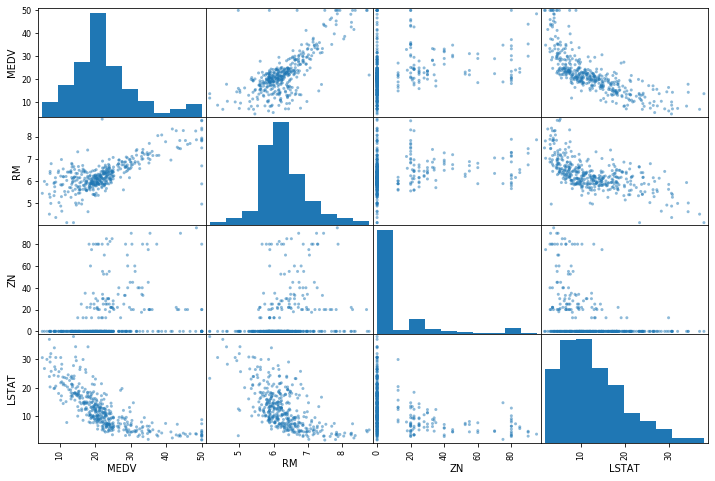

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12, 8))

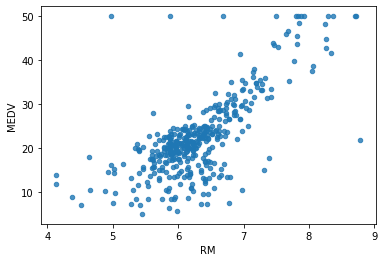

In [24]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.8)

## Trying out Attribute combinations

In [25]:
housing["TAXRM"] = housing['TAX'] / housing['RM']

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0,30.405405
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6,51.823093
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4,106.919249
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6,44.627585


In [27]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.723664
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
TAXRM     -0.567833
LSTAT     -0.739293
Name: MEDV, dtype: float64

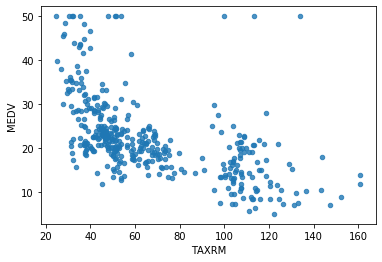

In [28]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 0.8)

In [29]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

To take care of missing attributes, you have three options:

1. Get rid of the missing data points.
2. Get rid of the whole attribute.
3. set the value to 0, mean or median

In [30]:
a = housing.dropna(subset = ['RM']) #Option 1
a.shape

(399, 13)

In [31]:
housing.drop('RM', axis = 1).shape #Option 2
# Note that there is no RM Column and also note that the original housing
# dataframe will remain unchanged.

(404, 12)

In [32]:
median = housing["RM"].median()  #Compute Median for OPtion 3

In [33]:
housing['RM'].fillna(median) #option 3
# Note that there is no RM Column and also note that the original housing
# dataframe will remain unchanged.

64     7.104
24     5.924
379    6.223
479    6.229
325    6.431
       ...  
455    6.525
59     5.927
417    5.304
140    6.174
493    5.707
Name: RM, Length: 404, dtype: float64

In [34]:
housing.shape

(404, 13)

In [35]:
housing.describe() # Before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.294301,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.695105,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.884500,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.617000,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
imputer.statistics_.shape

(13,)

In [38]:
X = imputer.transform(housing)

In [39]:
housing_tr = pd.DataFrame(X, columns = housing.columns)
housing_tr.shape

(404, 13)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.293233,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.690846,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.887250,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.608500,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
housing_tr.shape

(404, 13)

## Scikit-learn Design

Primarilly, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. Imputer. It has a fit meth and transform method.Fit method - Fits the dataset and calculates internal parameters.

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. Fit predict are two common functions. It also gives score function which will evaluate the predictions.

## Feature Scaling

Primarily, Two types of feature Scaling methods:

1. Min-Max Scaling (Normalization)
   value - min/(max-min). Value is between 0 and 1.
   Sklearn provides a class called MinMaxScaler for this.
   
2. Standardisation
   (value - mean) / std
   Sklearn provides a class called Standard Scaler for this.

## Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    # ... add as many as you want
    ('std_scaler', StandardScaler()), 
])

In [43]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [44]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model Dragon Real Estates

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
some_data = housing.iloc[:5]

In [47]:
some_labels = housing_labels[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([32.142, 16.086, 10.665, 20.586, 24.621])

In [50]:
list(some_labels)

[33.0, 15.6, 10.2, 21.4, 24.6]

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [52]:
rmse

1.3242257152953585

## Using better evaluation technique - Cross validation

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, 
                        scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([3.45510129, 4.51691791, 3.21135082, 3.37910923, 2.89253483,
       2.13192123, 3.04820048, 4.08530033, 4.57166865, 3.08850157])

In [55]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [56]:
print_scores(rmse_scores)

Scores:  [3.45510129 4.51691791 3.21135082 3.37910923 2.89253483 2.13192123
 3.04820048 4.08530033 4.57166865 3.08850157]
Mean:  3.4380606329819137
Standard deviation:  0.7211701187372634


## Convert the notebook to py file and run the pipeline

## Saving the model

In [57]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [58]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[46.793 20.255 27.92  11.264 15.537 23.869 31.585 21.71  20.353 28.885
 21.85  20.562 47.36  13.781 30.521 19.583 19.826 15.69  19.165 13.878
 21.884 20.92   9.139 18.472 15.024 20.464 21.396 23.116 32.98  13.978
 19.005 15.278 19.696 20.397 17.942 14.57  15.899 15.972 25.72  20.765
 31.991 33.77  14.882 19.311 14.837 20.503 17.549 15.393 45.186 24.834
 28.577 27.478 33.06  20.68  23.531 19.751 22.592 22.873 13.61  17.381
 16.175 22.906 20.3   33.597 17.273 12.121 38.621 24.911 20.262 20.767
 22.644 25.836 28.918 30.754 14.282 36.35  33.891 33.207 23.862 15.041
 21.941 21.023 26.877 14.974 16.3   33.818 23.756 21.778 19.081 30.04
 45.573 25.394 19.845 25.622 24.399 32.17  19.747 11.336 14.613 10.316
 30.377 12.203] [50.0, 19.3, 30.8, 11.8, 14.9, 22.9, 33.1, 26.4, 19.2, 31.5, 14.1, 20.1, 50.0, 14.9, 37.0, 23.1, 23.2, 16.2, 19.5, 13.4, 21.0, 21.7, 5.0, 23.7, 19.0, 19.4, 24.7, 24.8, 32.9, 8.4, 21.9, 14.3, 14.5, 19.9, 23.1, 12.7, 19.4, 13.8, 36.2, 23.4, 34.9, 32.7, 13.4, 18.3, 13.2, 18.9, 

In [59]:
final_rmse

3.381902904416678

In [60]:
prepared_data[0]

array([-0.41604527,  0.31960611, -1.43969621, -0.27288841, -1.19699755,
        1.17504213, -0.32947699,  2.54755519, -0.75533878, -1.13684942,
        0.04879332,  0.38760272, -0.64069431])

## Using the model

In [61]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')

features = np.array([[-10.41604527,  0.31960611, -1.43969621, -0.27288841, -1.19699755,
        -50.17504213, -40.32947699,  229.54755519, -6.75533878, -1.13684942,
        0.04879332,  0.38760272, -0.64069431]])
model.predict(features)

array([18.907])